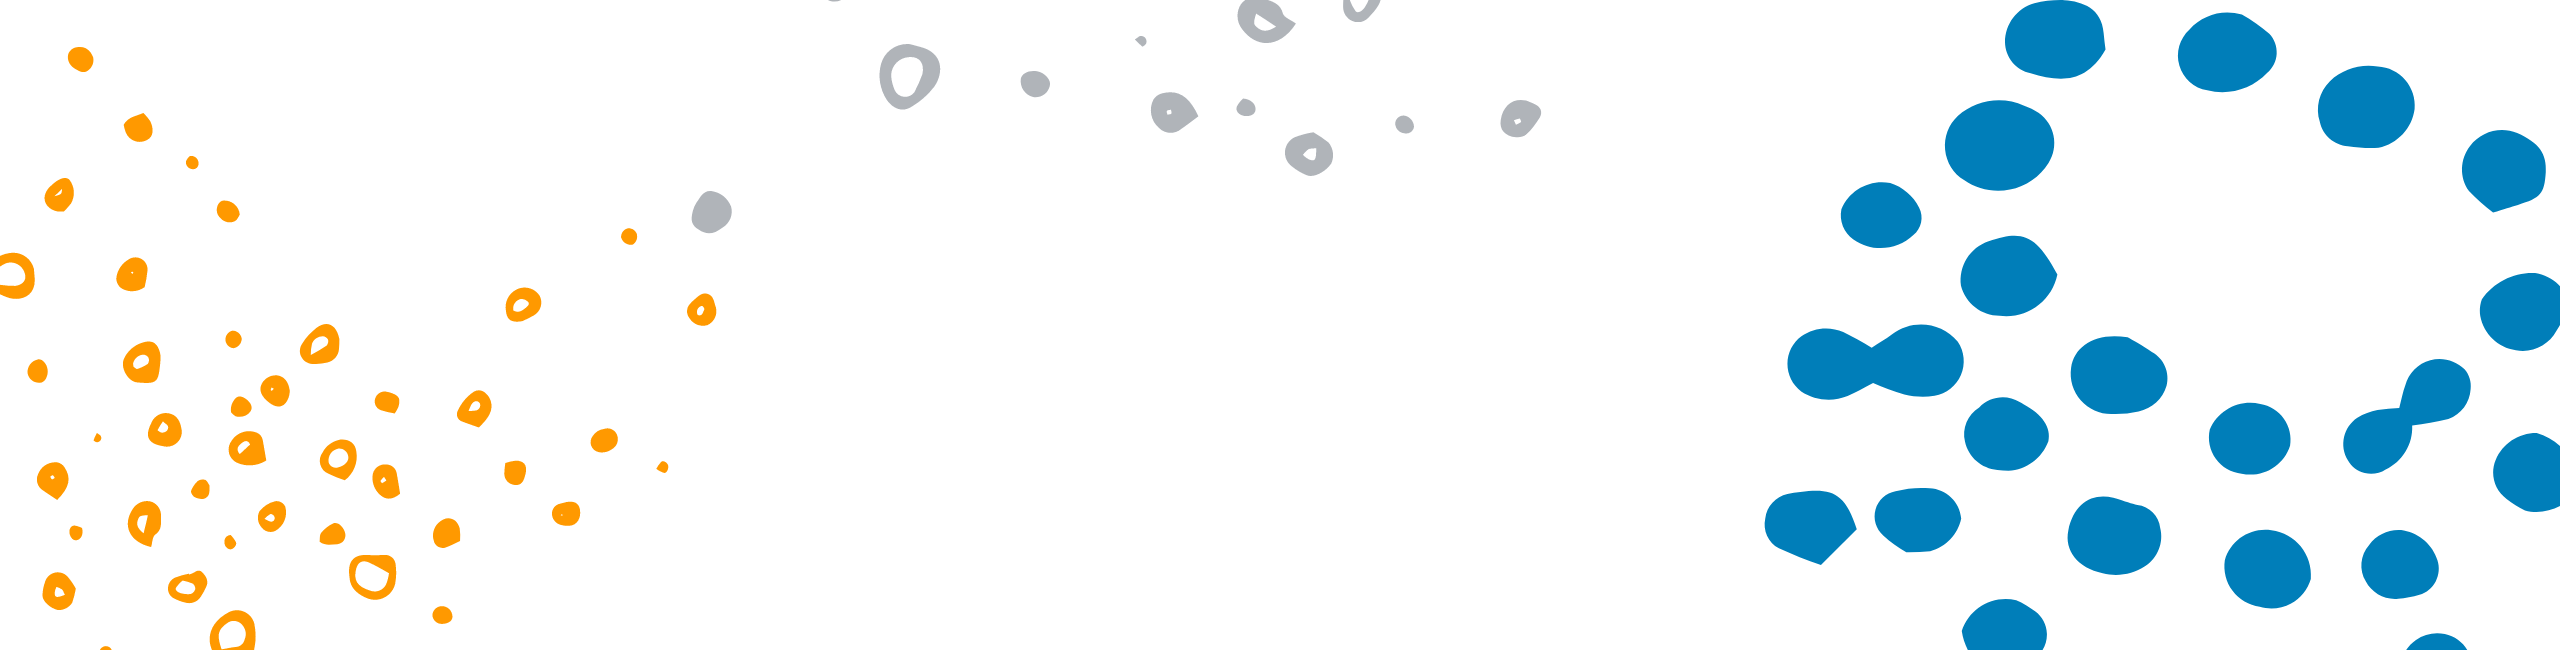

In [1]:
from IPython.display import Image
Image(filename='banner.png') 

# Make an interactive Dashboard using your own Amazon Data

## Step 1: Download Amazon data

Visit https://www.amazon.com/b2b/reports to request your data; use the quickset options to download specific time frames. 

## Step 2: Import Libraries and Dataframe
Pandas and Matplotlib help deal with data; Seaborn for styling and Jupyter widgets for interactivity. 

In [2]:
import pandas as pd #pip install pandas
import matplotlib.pyplot as plt # pip install matplotlib
import seaborn as sns # pip install seaborn
from ipywidgets import interact #pip install ipywidgets

In [3]:
# if you're working in a Jupyter notebook, use 
# jupyter nbextension enable --py widgetsnbextension

In [4]:
# import dataframe 
df = pd.read_csv('laura_amazon.csv')

In [5]:
df.head(2)

,Order Date,Order ID,Title,Category,ASIN/ISBN,UNSPSC Code,Website,Release Date,Condition,Seller,...,Carrier Name & Tracking Number,Item Subtotal,Item Subtotal Tax,Item Total,Tax Exemption Applied,Tax Exemption Type,Exemption Opt-Out,Buyer Name,Currency,Group Name
0,01/21/18,113-6967487-8357016,The Norse Shaman: Ancient Spiritual Practices ...,ABIS_BOOK,162055593X,55101500,Amazon.com,2016-08-27T00:00:01,new,Amazon.com,...,IPARCEL(AEIIPNJ0011513094),$15.48,$0.00,$15.48,NaN,NaN,NaN,Amorette,USD,NaN
1,01/21/18,113-6967487-8357016,AleHorn Viking Horn Mug with Stand - Handcraft...,DRINKING_CUP,B018SW4BZG,52152100,Amazon.com,NaN,new,Ale Horn,...,IPARCEL(AEIIPNJ0011513094),$32.83,$0.00,$32.83,NaN,NaN,NaN,Amorette,USD,NaN


In [6]:
df.columns

Index(['Order Date', 'Order ID', 'Title', 'Category', 'ASIN/ISBN',
       'UNSPSC Code', 'Website', 'Release Date', 'Condition', 'Seller',
       'Seller Credentials', 'List Price Per Unit', 'Purchase Price Per Unit',
       'Quantity', 'Payment Instrument Type', 'Purchase Order Number',
       'PO Line Number', 'Ordering Customer Email', 'Shipment Date',
       'Shipping Address Name', 'Shipping Address Street 1',
       'Shipping Address Street 2', 'Shipping Address City',
       'Shipping Address State', 'Shipping Address Zip', 'Order Status',
       'Carrier Name & Tracking Number', 'Item Subtotal', 'Item Subtotal Tax',
       'Item Total', 'Tax Exemption Applied', 'Tax Exemption Type',
       'Exemption Opt-Out', 'Buyer Name', 'Currency', 'Group Name'],
      dtype='object')

## Step 3. Tidy data

In [7]:
# pick only columns you're interested in. 'Item Total' will be my y axis because I would like to find out
# how much I have spent and on what 
df = df[['Order Date', 'Category', 'Condition', 'Item Total']]

In [8]:
df.head(2)

,Order Date,Category,Condition,Item Total
0,01/21/18,ABIS_BOOK,new,$15.48
1,01/21/18,DRINKING_CUP,new,$32.83


In [9]:
# remove dollar symbol from total and convert to numerical value 
df['Item Total'] = df['Item Total'].replace('[\$,]', "", regex=True)
df['Item Total'] = df['Item Total'].astype('float')

In [10]:
df.head()

,Order Date,Category,Condition,Item Total
0,01/21/18,ABIS_BOOK,new,15.48
1,01/21/18,DRINKING_CUP,new,32.83
2,01/21/18,ABIS_BOOK,used verygood,18.36
3,05/19/18,ABIS_BOOK,new,13.56
4,05/19/18,ABIS_BOOK,new,21.39


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Order Date  24 non-null     object 
 1   Category    24 non-null     object 
 2   Condition   24 non-null     object 
 3   Item Total  24 non-null     float64
dtypes: float64(1), object(3)
memory usage: 896.0+ bytes


## Step 4. Use ipywidgets to create a mini dashboard 

In [13]:
@interact

# make function, use columns as input, remove the column that is supposed to be your y axis
def create_amazonspending_plot(col = df.drop(['Item Total'], axis =1).columns):
    # add info into your plot, sns.catplot/scatterplot/swarmplot work too
    sns.stripplot(data = df, x = col, y ='Item Total', alpha=0.5, s=9)
    plt.title(f'Amazon Spending Habits grouped by {col}')
    
    # for a bit of styling: 
    sns.set_style('darkgrid')
    sns.set_palette('bright')
    
    # side note. different kernels display differently?!
    sns.set_context('notebook', font_scale = 1, rc = {"grid.linewidth":2}) 
    plt.xticks(rotation=70)
    plt.tight_layout()

    plt.show()

interactive(children=(Dropdown(description='col', options=('Order Date', 'Category', 'Condition'), value='Orde…

## Step 5. Look at your data and come to your own conclusions! 
Thanks for your time. 